In [166]:
import optlib as opt
import numpy as np
import plotly.graph_objects as go

### Creating American Put Option and grid

In [167]:
# setting the underlying
stock = opt.Underlying(65, 0.3, 0.3)
# creating the American Put option
AmPut = opt.Option(stock, "American", False, 50)
# creating the grid and adding option's parameters
grid = opt.Grid(300, 100, -4.0, 1.0)
grid.addOption(AmPut)
# setting boundary conditions
grid.setBoundsPut()

### Brennan-Schwartz algorythm implementation

In [168]:
# valuating the option using brennan schwartz algorythm
grid.BrennanSchwartz()
# transforming coordinates
grid.toNormal(True)

### Plotting grid with Early execution Curve

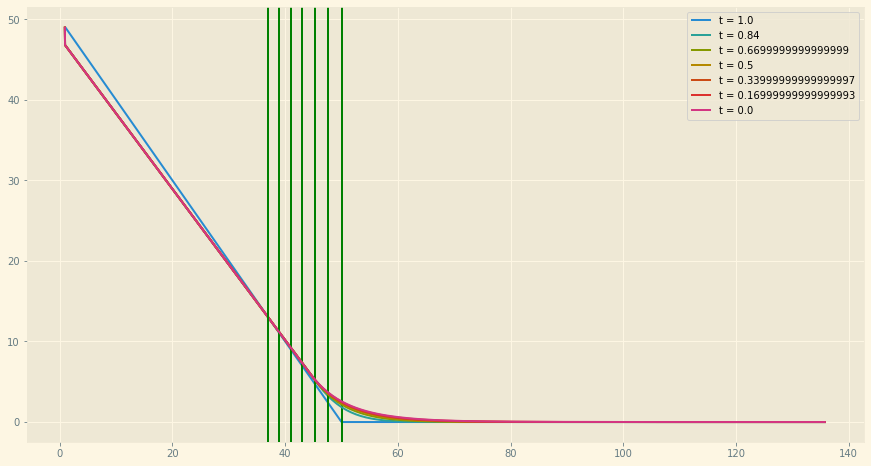

In [169]:
grid.plot()
grid.plot(7)

### Valuating European Put option with the same Underlying, Strike and Maturity

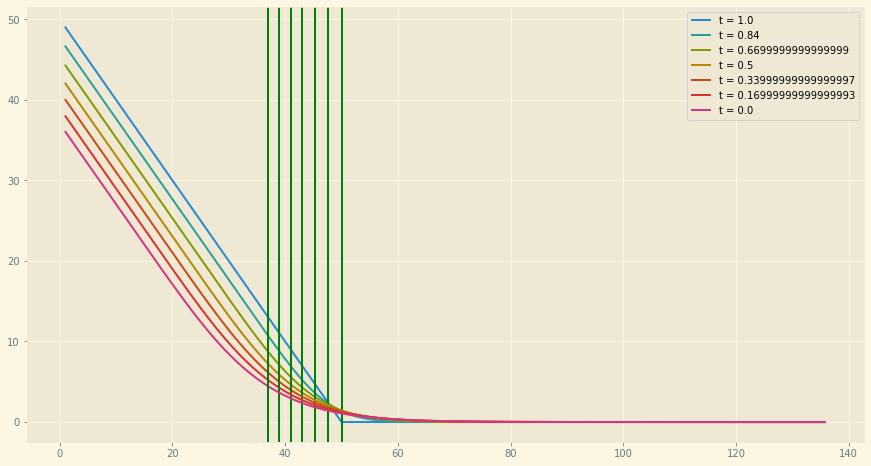

In [170]:
EuPut = opt.Option(stock, "European", False, 50)
# creating the grid and adding option's parameters
grid2 = opt.Grid(300, 100, -4.0, 1.0)
grid2.addOption(EuPut)
grid2.valuateBSM()
grid2.plot(7)
grid2.plot()

### Plotting the difference between American and European

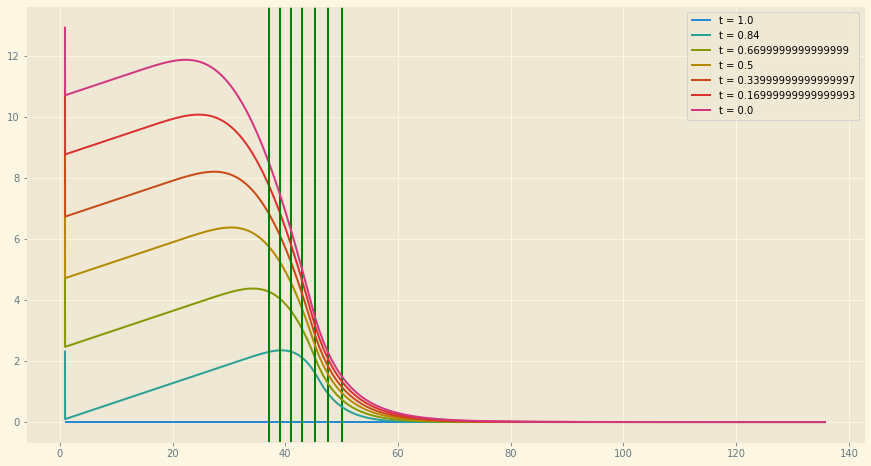

In [171]:
grid2.net = grid.net - grid2.net
grid2.plot()
grid2.plot(7)

### Calculating Vega $ dV/d\sigma $ via Finite Differences

In [182]:
grid1 = opt.Grid(300, 100, -4.0, 1.0)
grid1.addOption(AmPut)
print(grid1.lamda)
grid1.setBoundsPut()
grid1.BrennanSchwartz()
grid1.toNormal(True)
initial = grid1.net.copy()

shift_percent = 1
shift = shift_percent * grid.option.Underlying.volatility / 100
grid2 = opt.Grid(300, 100, -4.0, 1.0)
AmPut.Underlying.volatility += shift
grid2.addOption(AmPut)
grid2.setBoundsPut()
grid2.BrennanSchwartz()
grid2.toNormal(True)
shifted = grid2.net.copy()

diff = np.subtract(shifted, initial)
vega = diff / shift

surface = go.Surface(z=vega[30:,:], x=grid.tGrid, y=grid.xGrid[30:])
fig = go.Figure([surface])
fig.update_layout(title='V(S,t)', autosize=False,
                  width=800, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

1.8997654887303332


In [173]:
grid1 = opt.Grid(300, 100, -3.0, 1.0)
print(grid.lamda)
grid1.addOption(AmPut)
grid1.valuateBSM()
initial = grid1.net.copy()

shift_percent = 1
shift = shift_percent * grid.option.Underlying.volatility / 100
grid2 = opt.Grid(300, 100, -3.0, 1.0)
AmPut.Underlying.volatility += shift
grid2.addOption(AmPut)
grid2.valuateBSM()
shifted = grid2.net.copy()

diff = np.subtract(shifted, initial)
vega = diff / shift

surface = go.Surface(z=vega, x=grid.tGrid, y=grid.xGrid)
fig = go.Figure([surface])
fig.update_layout(title='V(S,t)', autosize=False,
                  width=800, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

1.6199999999999999
